# KNN- iris beispiel 

Automatically created module for IPython interactive environment


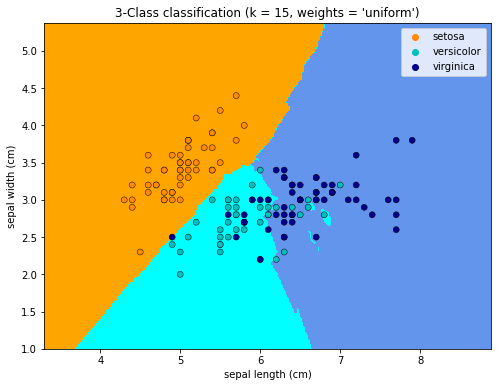

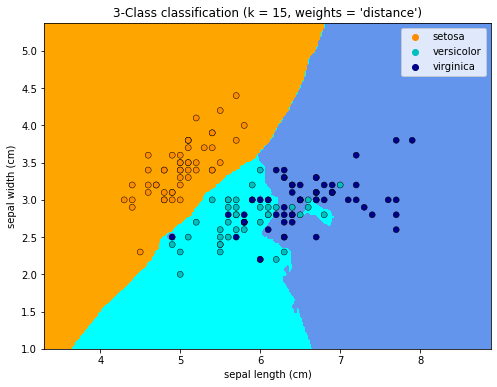

In [92]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [95]:
len(y)

150

In [106]:
# hole sensor daten
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/IBM/iot-predictive-analytics/master/data/iot_sensor_dataset.csv"
df_iotdata=pd.read_csv(url,error_bad_lines=False)
df_iotdata.head()

Xiot=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]
#X=df_iotdata[["footfall","outpressure"]]


y_target_iot=df_iotdata['fail']
y_target_iot.head()

X.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1


In [52]:
#https://github.com/Starignus/AppliedML_Python_Coursera/blob/master/adspy_shared_utilities.py

# KNN- neues beispiel sensor data

In [35]:
sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=3000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=3)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S15",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
Xs.shape

(9, 2)

In [51]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruits = pd.read_table('https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/fruit_data_with_colors.txt')
#fruits.head(20)

In [50]:
#fruits.describe()

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.76


In [48]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split



#Xiot=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]
X=Xs  #.truncate(after=10)

#X = fruits[['mass', 'width', 'height', 'color_score']]
#y = fruits['fruit_label']
y=ys  #.truncate(after=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):

    # as matrix set data its imßpoort for datframes
    X_mat = X.as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


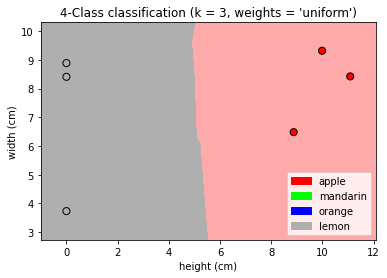

In [49]:
#call above function with kkn =3
plot_fruit_knn(X_train, y_train, 3, 'uniform')

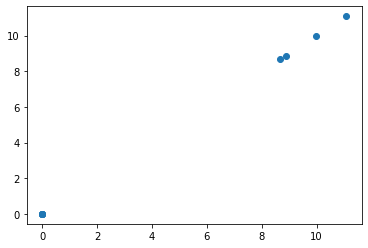

In [44]:
plt.scatter(Xs.iloc[:, 0],Xs.iloc[:, 0])